## Case  Study  2:  Data  Preparation  and  Exploratory  Analysis  of Insurance Customer Data 

# Table of Contents 

1. [**Introduction**](#1-introduction---understanding-insurance-and-the-role-of-data-analytics)  
   - [1.1 Objective](#11-objective)  
   - [1.2 Scope](#12-scope)  
   - [1.3 Assumptions](#13-assumptions)  

2. [**Methodology**](#2-methodology)  
   - [2.1 Data Understanding](#21-data-understanding)  
   - [2.2 Data Preprocessing](#22-data-preprocessing)  
     - [2.2.1 Handling Missing Values](#221-handling-missing-values)  
     - [2.2.2 Removing Duplicates](#222-removing-duplicates)  
     - [2.2.3 Standardizing Categorical Data](#223-standardizing-categorical-data)  
     - [2.2.4 Handling Outliers](#224-handling-outliers)  
     - [2.2.5 Feature Engineering](#225-feature-engineering)  

3. [**Exploratory Data Analysis (EDA)**](#3-exploratory-data-analysis-eda)  
   - [3.1 Summary Statistics](#31-summary-statistics)  
   - [3.2 Distribution Analysis](#32-distribution-analysis)  
   - [3.3 Relationship Analysis](#33-relationship-analysis)  
   - [3.4 Customer Segmentation](#34-customer-segmentation)  
  

4. [**Conclusion & Recommendations**](#5-conclusion--recommendations)  


## 1. **Introduction - Understanding Insurance and the Role of Data Analytics**  

The **insurance industry** is one of the most data-driven sectors globally, built on the principle of <u>risk assessment</u> evaluating the likelihood of an event (such as an accident, illness, or property damage) and setting policy terms accordingly. The global insurance market was worth roughly eight trillion US dollars in 2024, but this looks set to increase substantially in the coming years.([Source: Statista](https://www.statista.com/outlook/fmo/insurances/worldwide))

**Why does data analytics matter in insurance?**  
Insurance companies rely on data to:  
- Assess risk and set premiums based on customer profiles.  
- Detect fraudulent claims, preventing billions in losses annually.  
- Enhance customer experience by personalizing policy recommendations.  
- Optimize pricing strategies to balance affordability and profitability.  


### 1.1. **Objective**  
This case study aims to analyze a raw insurance dataset to:  
1. Identify and clean data quality issues such as missing values, duplicates, and inconsistencies.  
2. Transform and prepare data for analysis through standardization and feature engineering.  
3. Perform Exploratory Data Analysis (EDA) to uncover trends in policyholder behavior.  
4. Derive business insights that can help insurers optimize pricing, detect fraud, and improve customer satisfaction.  

### 1.2. **Scope**  
This study will focus on:  
- **Data Quality Assessment & Cleaning** – Handling missing values, duplicates, and incorrect formats.  
- **Data Transformation & Feature Engineering** – Standardizing categorical data and creating new features.  
- **Exploratory Data Analysis (EDA)** – Using statistical summaries and visualizations.  
- **Insights & Recommendations** – Providing actionable insights for decision-making.  

It will not cover advanced predictive modeling or machine learning but will lay the groundwork for such applications.  

### 1.3. **Assumptions**  
- The dataset is representative of the company’s policyholders.  
- Categorical variables (e.g., Gender) may have inconsistencies in labeling.  
- Premium amounts and claim counts may have outliers due to unusual cases.  
- A synthetic data has been created for the analysis of the case study.  

By the end of this study, we will see how data analytics transforms raw data into actionable insights, improving business decision-making in the insurance industry.

## **2. Methodology**  

The methodology involves a structured approach to understanding, cleaning, and analyzing the insurance dataset. This section outlines the technical steps taken to prepare the data for analysis, ensuring it is accurate, consistent, and insightful.  

### 2.1 **Data Understanding**  
Before diving into preprocessing, we first explore the dataset structure:  

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv("insurance_customer_data.csv")
data.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction
0,CUST_1083,18.0,M,Home,3941.88,2.0,East,2022-01-05,3.0
1,CUST_1053,NaN,M,Home,4023.55,10.0,North,2020-04-27,NaN
2,CUST_1070,49.0,F,Auto,46812.00,7.0,South,2023-12-26,1.0
3,CUST_1045,68.0,F,Life,2020.07,9.0,North,2022-04-05,3.0
4,CUST_1044,78.0,Male,Home,1801.37,8.0,West,2019-11-18,5.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            100 non-null    object 
 1   Age                    96 non-null     float64
 2   Gender                 95 non-null     object 
 3   Policy_Type            100 non-null    object 
 4   Premium                95 non-null     float64
 5   Claim_Count            95 non-null     float64
 6   Region                 100 non-null    object 
 7   Date_Joined            100 non-null    object 
 8   Customer_Satisfaction  95 non-null     float64
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [55]:
data.describe()

,Age,Premium,Claim_Count,Customer_Satisfaction
count,96.000000,95.000000,95.000000,95.000000
mean,48.114583,4440.043474,5.273684,5.526316
std,19.656990,7801.276668,3.390983,2.842841
min,18.000000,626.270000,0.000000,1.000000
25%,30.750000,1975.600000,2.000000,3.000000
50%,47.500000,3211.830000,5.000000,6.000000
75%,62.000000,4397.580000,8.500000,8.000000
max,105.000000,46812.000000,10.000000,10.000000


The dataset shows a diverse age range (18–105) and high premium variability (₹626–₹46,812) which could be a case of outlier(s).

The data shows an average of 5 claims per customer and a moderate satisfaction of 5.5.

### 2.2. **Data Quality Assessment & Cleaning**

o List the potential data quality challenges you might encounter (e.g., missing 
values,  duplicate  records,  inconsistent  formats  in  categorical  data,  outlier 
values). 

#### 2.2.1 Handling Missing Values

In [56]:
# missing values in terms of percent

data.isnull().sum()

Customer_ID              0
Age                      4
Gender                   5
Policy_Type              0
Premium                  5
Claim_Count              5
Region                   0
Date_Joined              0
Customer_Satisfaction    5
dtype: int64

The columns `Age` `Gender` `Premium` `Claim_Count` and `Customer_Satisfaction` contain missing values. Missing values can affect revenue calculations and risk assessments. To fill in missing values, we can use imputation methods -

- imputation by mean: good for continuous values but sensitive to outliers
- imputation by median: good for continuous values and less sensitive to outliers
- imputation by mode: good for categorical values

To maintain data integrity and minimize bias: `Age` and `Premium` are imputed with the median to handle skewed distributions, `Gender` and `Claim_Count` use the mode as they are categorical/discrete, and `Customer_Satisfaction` is filled with the median to prevent extreme values from distorting insights.

In [57]:

# impute age by median
data['Age'] = data['Age'].fillna(data['Age'].median())

# impute gender by median
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

# impute claim_count by mode
data['Claim_Count'] = data['Claim_Count'].fillna(data['Claim_Count'].mode()[0])

# impute premium by median as it can deal with outliers better
data['Premium'] = data['Premium'].fillna(data['Premium'].median())

# impute customer_satisfaction by median
data['Customer_Satisfaction'] = data['Customer_Satisfaction'].fillna(data['Customer_Satisfaction'].median())


In [58]:
data.isnull().sum()

Customer_ID              0
Age                      0
Gender                   0
Policy_Type              0
Premium                  0
Claim_Count              0
Region                   0
Date_Joined              0
Customer_Satisfaction    0
dtype: int64

#### 2.2.2 **Removing Duplicates**

In [59]:
# duplicate rows

data.duplicated().sum()

np.int64(6)

There are 6 duplicate rows. Removing duplicate rows is necessary to ensure data integrity, prevent bias in analysis, and improve model performance by avoiding redundant information.

In [60]:
data[data.duplicated(keep=False)]


,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction
9,CUST_1000,55.0,M,Life,792.40,6.0,West,2016-08-28,9.0
14,CUST_1000,55.0,M,Life,792.40,6.0,West,2016-08-28,9.0
27,CUST_1006,57.0,Male,Life,2942.91,10.0,North,2018-03-04,4.0
28,CUST_1009,68.0,F,Life,4621.31,5.0,North,2020-11-03,3.0
54,CUST_1008,41.0,Male,Home,1919.86,8.0,South,2018-12-19,3.0
56,CUST_1006,57.0,Male,Life,2942.91,10.0,North,2018-03-04,4.0
61,CUST_1009,68.0,F,Life,4621.31,5.0,North,2020-11-03,3.0
74,CUST_1008,41.0,Male,Home,1919.86,8.0,South,2018-12-19,3.0
84,CUST_1001,20.0,F,Auto,1725.27,8.0,West,2016-08-15,10.0
87,CUST_1002,22.0,Female,Life,3118.24,9.0,South,2017-02-22,6.0


In [61]:
data = data.drop_duplicates().reset_index(drop=True)


In [62]:
data.duplicated().sum()

np.int64(0)

All duplicate records are removed.

#### 2.2.3 **Standardizing Categorical Data**

Standardizing data brings numerical features like **Premium** and **Claim_Count** to a uniform scale, preventing dominance by larger values. This is essential in banking and insurance for unbiased risk evaluation, better model performance, and precise customer segmentation.

In [63]:
# handling inconsistent format
# categorical columns
cat_cols = [col for col in data.select_dtypes(include=['object']).columns if col not in ['Customer_ID', 'Date_Joined']]
cat_cols


['Gender', 'Policy_Type', 'Region']

Now, we have to check the unique values of each of these categorical variables to see if there are any inconsistency in formatting.

In [64]:
for col in cat_cols:
    print(data[col].unique())

['M' 'F' 'Male' 'Female' 'Other']
['Home' 'Auto' 'Life']
['East' 'North' 'South' 'West']


What is crucial for us are these columns and their unique values-

- Gender - ['M' 'F' 'Male' 'Female' 'Other']
- Policy_Type - ['Home' 'Auto' 'Life']
- Region - ['North' 'South' 'East' 'West']

We need to convert these variables into numerical categorical variables for better processing in machine learning models, as models work with numbers, not text.




In [65]:
data['Gender'] = data['Gender'].map({'M': 0, 'Male': 0, 'F':1, 'Female': 1, 'Other': 2})
data['Policy_Type'] = data['Policy_Type'].map({'Home': 0, 'Auto': 1, 'Life': 2})
data['Region'] = data['Region'].map({'North': 0, 'South': 1, 'East': 2, 'West': 3})

In [66]:
for col in cat_cols :
    print(data[col].unique())

[0 1 2]
[0 1 2]
[2 0 1 3]


Successfully converted categorical columns to numerical!

#### 2.2.4 **Handling Outliers**



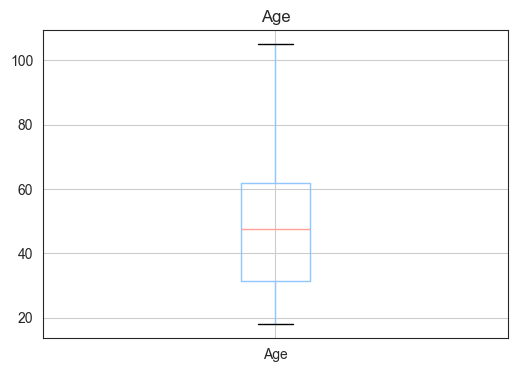

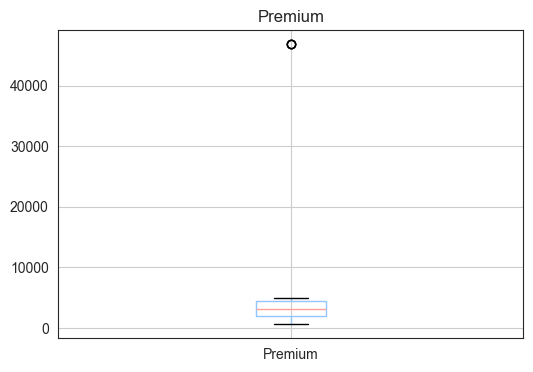

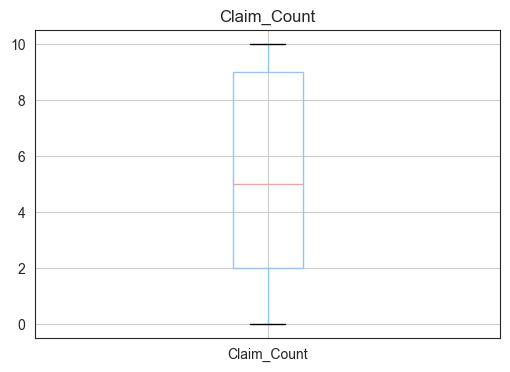

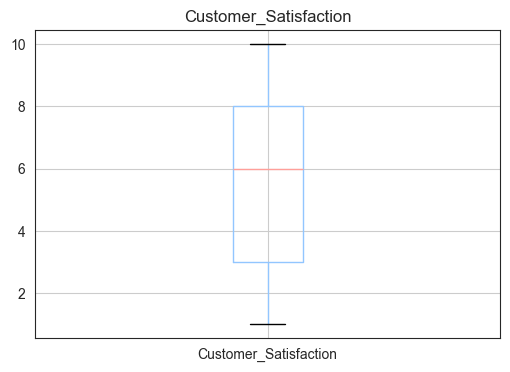

In [67]:
import matplotlib.pyplot as plt

num_cols = ['Age', 'Premium', 'Claim_Count', 'Customer_Satisfaction']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    data.boxplot(column=col)
    plt.title(col)
    plt.show()


Outliers detected in `Premium` column. Handling outliers in insurance is crucial because extreme values, like an unusually high **premium (₹46,812)**  can distort risk assessments, leading to incorrect pricing, fraud detection errors, or biased predictive models.

In [68]:

Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((data[num_cols] < lower_bound) | (data[num_cols] > upper_bound)).sum()
print(outliers)  


Age                      0
Premium                  3
Claim_Count              0
Customer_Satisfaction    0
dtype: int64


In [69]:
# winsorization

data[num_cols] = data[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)


Winsorization is a technique to replace extreme values (outliers) with nearest threshold

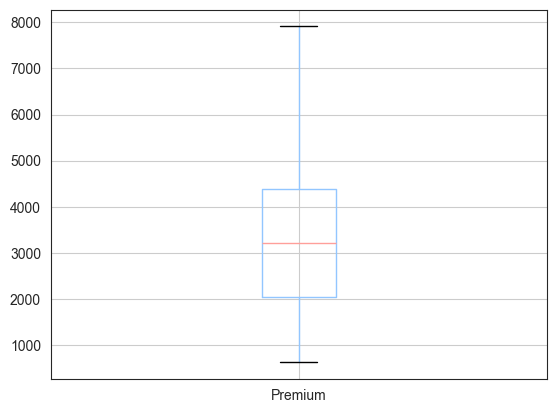

In [70]:
data.boxplot(column='Premium')
plt.show()


o Why  addressing  these  issues  is  critical  before  proceeding  with  any 
analysis?

Insurance companies rely on accurate and clean data to assess risk, calculate premiums, and predict claim likelihood. If the data is flawed, it can lead to incorrect pricing, wrong predictions, and financial losses.

Missing values (e.g., absent age or claim count) can mislead risk assessments, so they must be imputed correctly. Duplicate records (e.g., the same customer_ID appearing twice) can inflate claims or premiums, distorting financial projections. Inconsistent formats in categorical data (e.g., "M" vs. "Male" for Gender) can cause grouping errors leading to inaccurate segmentation. Outliers, such as an unusually high Premium of ₹10 million when the average is ₹5,000, can skew pricing models and fraud detection.

In [71]:
data_cleaned = data.copy() # for later analysis
data_cleaned.to_csv('data_cleaned.csv', index=False)

#### 2.2.5 **Feature Engineering**



In [72]:
data.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction
0,CUST_1083,18.0,0,0,3941.880,2.0,2,2022-01-05,3.0
1,CUST_1053,47.5,0,0,4023.550,10.0,0,2020-04-27,6.0
2,CUST_1070,49.0,1,1,7907.945,7.0,1,2023-12-26,1.0
3,CUST_1045,68.0,1,2,2020.070,9.0,0,2022-04-05,3.0
4,CUST_1044,78.0,0,0,1801.370,8.0,3,2019-11-18,5.0


In [73]:
data['Date_Joined'] = pd.to_datetime(data['Date_Joined']) 
data['Year_Joined'] = data['Date_Joined'].dt.year  
data['Month_Joined'] = data['Date_Joined'].dt.month  


In [74]:
data['Tenure_Years'] = (pd.to_datetime('today') - data['Date_Joined']).dt.days / 365


In [75]:
data.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction,Year_Joined,Month_Joined,Tenure_Years
0,CUST_1083,18.0,0,0,3941.880,2.0,2,2022-01-05,3.0,2022,1,3.230137
1,CUST_1053,47.5,0,0,4023.550,10.0,0,2020-04-27,6.0,2020,4,4.923288
2,CUST_1070,49.0,1,1,7907.945,7.0,1,2023-12-26,1.0,2023,12,1.257534
3,CUST_1045,68.0,1,2,2020.070,9.0,0,2022-04-05,3.0,2022,4,2.983562
4,CUST_1044,78.0,0,0,1801.370,8.0,3,2019-11-18,5.0,2019,11,5.364384


In [76]:
## Derived features

# age groups 
age_bins = [0, 25, 40, 60, 120]  # Changed 100 -> 120
labels = ['<25', '25-40', '40-60', '60+']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=labels, right=False, include_lowest=True)

# tenure brackets
tenure_bins = [0, 1, 3, 15]  
labels = ['New (<1 year)', '1-3 years', '3+ years']
data['Tenure_Category'] = pd.cut(data['Tenure_Years'], bins=tenure_bins, labels=labels, right=False, include_lowest=True)

data.head()



,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction,Year_Joined,Month_Joined,Tenure_Years,Age_Group,Tenure_Category
0,CUST_1083,18.0,0,0,3941.880,2.0,2,2022-01-05,3.0,2022,1,3.230137,<25,3+ years
1,CUST_1053,47.5,0,0,4023.550,10.0,0,2020-04-27,6.0,2020,4,4.923288,40-60,3+ years
2,CUST_1070,49.0,1,1,7907.945,7.0,1,2023-12-26,1.0,2023,12,1.257534,40-60,1-3 years
3,CUST_1045,68.0,1,2,2020.070,9.0,0,2022-04-05,3.0,2022,4,2.983562,60+,1-3 years
4,CUST_1044,78.0,0,0,1801.370,8.0,3,2019-11-18,5.0,2019,11,5.364384,60+,3+ years


In [77]:
data['Age'].max()

np.float64(105.0)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_ID            94 non-null     object        
 1   Age                    94 non-null     float64       
 2   Gender                 94 non-null     int64         
 3   Policy_Type            94 non-null     int64         
 4   Premium                94 non-null     float64       
 5   Claim_Count            94 non-null     float64       
 6   Region                 94 non-null     int64         
 7   Date_Joined            94 non-null     datetime64[ns]
 8   Customer_Satisfaction  94 non-null     float64       
 9   Year_Joined            94 non-null     int32         
 10  Month_Joined           94 non-null     int32         
 11  Tenure_Years           94 non-null     float64       
 12  Age_Group              94 non-null     category      
 13  Tenure_

In [79]:
data.isnull().sum()

Customer_ID              0
Age                      0
Gender                   0
Policy_Type              0
Premium                  0
Claim_Count              0
Region                   0
Date_Joined              0
Customer_Satisfaction    0
Year_Joined              0
Month_Joined             0
Tenure_Years             0
Age_Group                0
Tenure_Category          0
dtype: int64

Some  more derived features include `Claim Frequency Category` which categorize customers based on the number of claims made. It helps distinguish between low risk and high risk policyholder, `Loyalty_Segment` that identifies long-term customers for retention strategies.

In [80]:
data["Claim_Frequency"] = pd.cut(data["Claim_Count"], bins=[0, 2, 5, np.inf], labels=["Low", "Medium", "High"])
data["Loyalty_Segment"] = pd.cut(data["Tenure_Years"], bins=[0, 3, 7, np.inf], labels=["New", "Mid-term", "Loyal"])


In [81]:
data.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction,Year_Joined,Month_Joined,Tenure_Years,Age_Group,Tenure_Category,Claim_Frequency,Loyalty_Segment
0,CUST_1083,18.0,0,0,3941.880,2.0,2,2022-01-05,3.0,2022,1,3.230137,<25,3+ years,Low,Mid-term
1,CUST_1053,47.5,0,0,4023.550,10.0,0,2020-04-27,6.0,2020,4,4.923288,40-60,3+ years,High,Mid-term
2,CUST_1070,49.0,1,1,7907.945,7.0,1,2023-12-26,1.0,2023,12,1.257534,40-60,1-3 years,High,New
3,CUST_1045,68.0,1,2,2020.070,9.0,0,2022-04-05,3.0,2022,4,2.983562,60+,1-3 years,High,New
4,CUST_1044,78.0,0,0,1801.370,8.0,3,2019-11-18,5.0,2019,11,5.364384,60+,3+ years,High,Mid-term


In [82]:
data['Age_Group'].unique()

['<25', '40-60', '60+', '25-40']
Categories (4, object): ['<25' < '25-40' < '40-60' < '60+']

In [83]:
data["Claim_Frequency_Num"] = data["Claim_Frequency"].map({"Low": 1, "Medium": 2, "High": 3})
data["Loyalty_Segment_Num"] = data["Loyalty_Segment"].map({"New": 1, "Mid-term": 2, "Loyal": 3})


In [84]:
data_transformed = data.copy()
data_transformed.to_csv('data_transformed.csv', index=False)


In [85]:
## Data Summarization

avg_premium_region = data.groupby('Region')['Premium'].mean().sort_values(ascending=False)
print("\nAverage Premium per Region:")
print(avg_premium_region)

avg_claim_policy = data.groupby('Policy_Type')['Claim_Count'].mean().sort_values(ascending=False)
print("\nAverage Claim Count per Policy Type:")
print(avg_claim_policy)

total_premium_policy = data.groupby('Policy_Type')['Premium'].sum().sort_values(ascending=False)
print("\nTotal Premium per Policy Type:")
print(total_premium_policy)

avg_satisfaction_age = data.groupby('Age_Group')['Customer_Satisfaction'].mean().sort_values(ascending=False)
print("\nAverage Customer Satisfaction per Age Group:")
print(avg_satisfaction_age)

claim_frequency_counts = data['Claim_Frequency'].value_counts(normalize=True).sort_values(ascending=False) * 100
print("\nClaim Frequency Distribution (%):")
print(claim_frequency_counts)

loyalty_segment_counts = data['Loyalty_Segment'].value_counts(normalize=True).sort_values(ascending=False) * 100
print("\nLoyalty Segment Distribution (%):")
print(loyalty_segment_counts)




Average Premium per Region:
Region
2    3640.927500
1    3281.019750
0    3249.719074
3    3045.595968
Name: Premium, dtype: float64

Average Claim Count per Policy Type:
Policy_Type
1    7.250000
0    4.771429
2    4.685714
Name: Claim_Count, dtype: float64

Total Premium per Policy Type:
Policy_Type
2    118384.065
0    114421.035
1     73226.025
Name: Premium, dtype: float64

Average Customer Satisfaction per Age Group:
Age_Group
<25      6.454545
25-40    6.136364
40-60    5.411765
60+      4.814815
Name: Customer_Satisfaction, dtype: float64

Claim Frequency Distribution (%):
Claim_Frequency
High      54.117647
Medium    23.529412
Low       22.352941
Name: proportion, dtype: float64

Loyalty Segment Distribution (%):
Loyalty_Segment
Mid-term    55.319149
Loyal       23.404255
New         21.276596
Name: proportion, dtype: float64


C:\Users\nirul\AppData\Local\Temp\ipykernel_32472\2786359924.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_satisfaction_age = data.groupby('Age_Group')['Customer_Satisfaction'].mean().sort_values(ascending=False)


<u>Points to be noted:</u>

1. **Average Premium per Region:** Region '2' exhibits the highest average premium, suggesting a concentration of higher-value policies or customer segments with greater coverage needs in this area. Regions '1' and '0' follow closely, while Region '3' has the lowest average premium, potentially indicating a market with more budget-conscious customers or different policy offerings.


2. **Average Claim Count per Policy Type:** Policy Type '1' has the highest average claim count, indicating that customers with this type of policy are more likely to file claims. This could be due to the nature of the coverage offered by Policy Type '1' (covering more frequent events), a higher risk profile of individuals choosing this policy, or potentially issues with the product or service associated with this policy leading to more claims.

3. **Total Premium per Policy Type:** Policy Types '2' and '0' generate the most total premium for the company, despite Policy Type '1' having a higher average claim count. This suggests that while individual Policy Type '1' holders claim more often, there are a larger number of customers with Policy Types '2' and '0', or their premiums are significantly higher, contributing more to the overall revenue.

4. **Average Customer Satisfaction per Age Group:** Customer satisfaction appears to decrease with age. The <25 age group reports the highest average satisfaction, while the 60+ group reports the lowest. This trend could be attributed to varying expectations, service needs, or how well the company's offerings cater to the specific requirements of different age demographics. Younger customers might have simpler needs or be more easily satisfied, while older customers might have more complex requirements or higher expectations based on their life stage.

5. **Claim Frequency Distribution:** A significant portion of customers (over 54%) are categorized as having "High" claim frequency. This indicates a considerable level of claim activity within the customer base, which could have implications for the company's profitability and risk management. Understanding the drivers behind this high claim frequency is crucial.

6. **Loyalty Segment Distribution:** The majority of customers fall into the "Mid-term" loyalty segment. This suggests that while the company is retaining a substantial portion of its customers beyond the initial phase, there might be opportunities to further nurture these mid-term customers into the "Loyal" segment to increase long-term customer value and reduce churn. The "New" segment represents the influx of new customers, and its size is important for growth assessment.

In [86]:
kpi_summary = pd.DataFrame({
    'Total Customers': [len(data)],
    'Average Premium': [data['Premium'].mean()],
    'Total Claims': [data['Claim_Count'].sum()],
    'Average Claim Count': [data['Claim_Count'].mean()],
    'Average Customer Satisfaction': [data['Customer_Satisfaction'].mean()],
    'Customer Retention Rate (Illustrative - needs more data over time)': [
        len(data['Customer_ID'].unique()) 
    ]
})

print("\nOverall Company KPIs:")
kpi_summary


Overall Company KPIs:


,Total Customers,Average Premium,Total Claims,Average Claim Count,Average Customer Satisfaction,Customer Retention Rate (Illustrative - needs more data over time)
0,94,3255.650266,505.0,5.37234,5.531915,90


The company currently serves 94 customers with an average premium of ₹3255.65 and an average customer satisfaction of 5.37, while experiencing a total of 505 claims and an average claim count of 5.37, with customer retention needing further data for accurate assessment.

## 3.**Exploratory Data Analysis (EDA)**

In this section, we will delve into Exploratory Data Analysis (EDA) to gain a deeper understanding of our insurance customer data. Through summary statistics, we get to uncover a concise numerical overview of the data's central tendencies and spread for each variable, distribution analysis examines the frequency and range of values for individual variables to understand their underlying patterns, relationship analysis investigates how different variables interact and correlate with each other to identify potential dependencies and customer segmentation groups customers based on shared characteristics to identify distinct segments with unique behaviors and needs.

In [87]:
data_cleaned.head()

,Customer_ID,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Date_Joined,Customer_Satisfaction
0,CUST_1083,18.0,0,0,3941.880,2.0,2,2022-01-05,3.0
1,CUST_1053,47.5,0,0,4023.550,10.0,0,2020-04-27,6.0
2,CUST_1070,49.0,1,1,7907.945,7.0,1,2023-12-26,1.0
3,CUST_1045,68.0,1,2,2020.070,9.0,0,2022-04-05,3.0
4,CUST_1044,78.0,0,0,1801.370,8.0,3,2019-11-18,5.0


### 3.1 **Summary Statistics**


In [88]:
data_cleaned.describe()

,Age,Gender,Policy_Type,Premium,Claim_Count,Region,Customer_Satisfaction
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,48.361702,0.723404,1.000000,3255.650266,5.372340,1.542553,5.531915
std,19.304772,0.739140,0.867576,1521.868079,3.501103,1.223997,2.769659
min,18.000000,0.000000,0.000000,626.270000,0.000000,0.000000,1.000000
25%,31.500000,0.000000,0.000000,2043.745000,2.000000,0.000000,3.000000
50%,47.500000,1.000000,1.000000,3211.830000,5.000000,1.500000,6.000000
75%,61.750000,1.000000,2.000000,4389.425000,9.000000,3.000000,8.000000
max,105.000000,2.000000,2.000000,7907.945000,10.000000,3.000000,10.000000


This table provides summary statistics for key numerical features of the customer dataset (with 94 records):

The average age is around 48 years, gender is almost evenly split, the average policy type is 1, the average premium is approximately ₹3255.65, the average claim count is about 5.37, regions are distributed somewhat evenly (mean of 1.54 across 0-3), and the average customer satisfaction is 5.53 out of 10.

### 3.2 **Distribution Analysis**

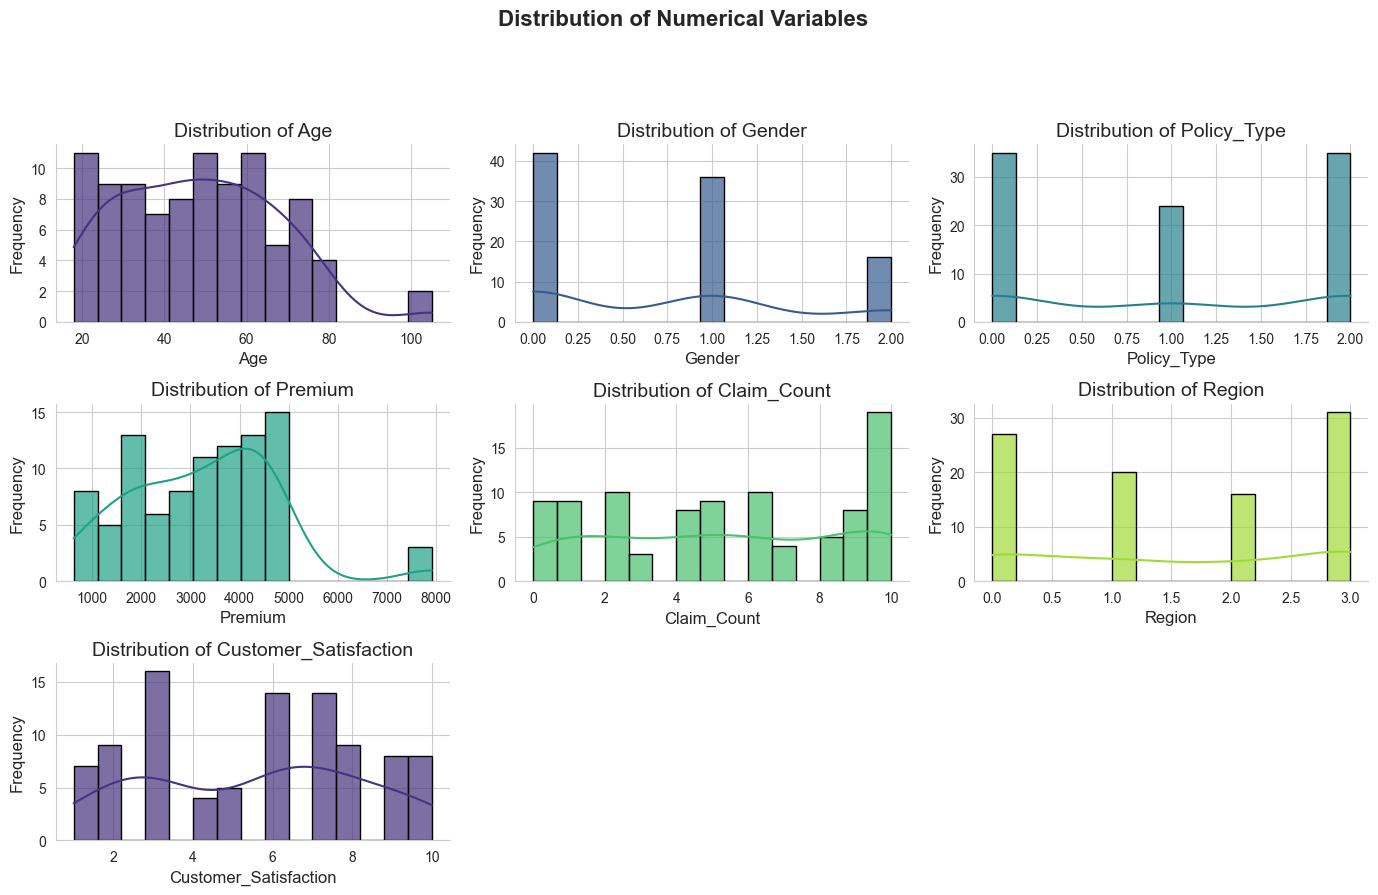

In [89]:

sns.set_style("whitegrid")  
plt.figure(figsize=(14, 9))  

numerical_cols = data_cleaned.select_dtypes(include=['number']).columns

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  
    sns.histplot(data_cleaned[col], bins=15, kde=True, color=sns.color_palette("viridis")[i % len(sns.color_palette("viridis"))], edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine() 

plt.suptitle('Distribution of Numerical Variables', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

sns.set_style("white")

The distributions reveal several insights into the customer data:

- Age appears somewhat normally distributed with a slight skew towards younger individuals and a few potential outliers at higher ages. 
- Gender is distributed across three categories, with a near-even split between the first two and a smaller representation in the third.
- Policy Type is concentrated in three distinct categories. 
- Premium amounts show a right-skewed distribution, indicating a larger number of customers with lower premiums and fewer with very high premiums. 
- Claim counts are heavily skewed towards lower values, with most customers having few or no claims, and a decreasing frequency as the number of claims increases. 
- Customer satisfaction scores tend to cluster in the higher range, suggesting a generally satisfied customer base, although there are noticeable peaks at certain integer values. 
- Finally, Region shows a distribution across four categories, with varying frequencies in each.

### 3.3 **Relationship Analysis**

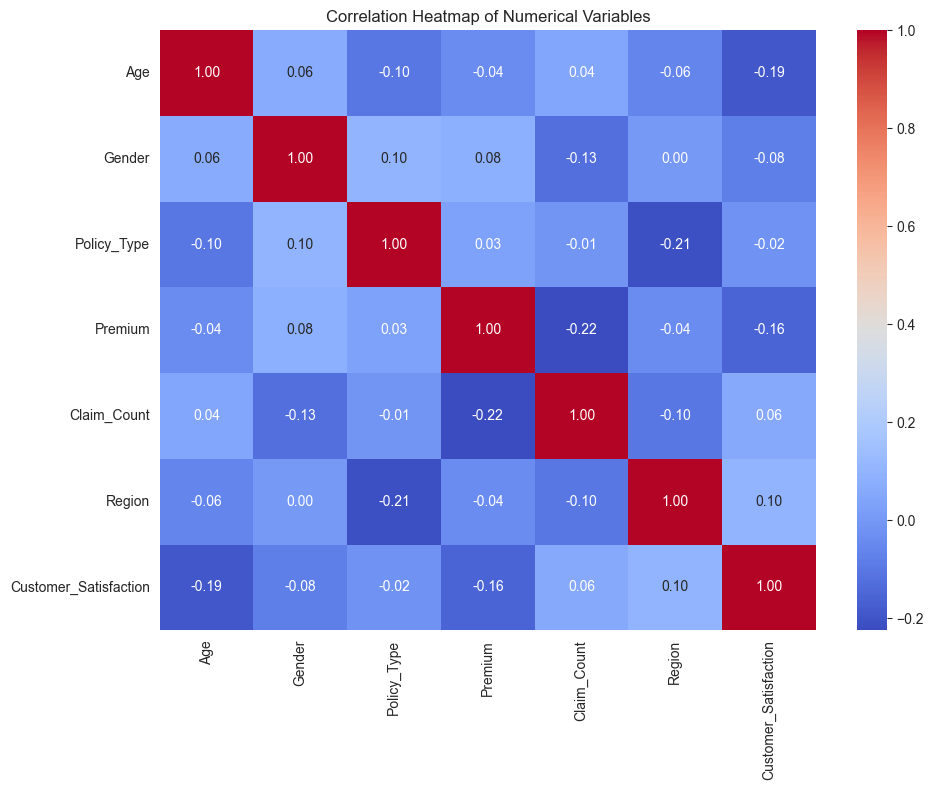

In [90]:
correlation_matrix = data_cleaned[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

The correlation heatmap reveals weak linear relationships between most numerical variables. 

- There's a moderate negative correlation between Premium and Claim Count (-0.22), suggesting that higher premiums might be associated with fewer claims, or vice versa, though this relationship isn't very strong.
- Customer Satisfaction shows a slight negative correlation with Age (-0.19) and Premium (-0.16), indicating a tendency for older customers or those with higher premiums to be slightly less satisfied, but again, these are weak trends.
- Other correlations are close to zero, implying minimal linear association between those pairs of numerical features in the dataset.

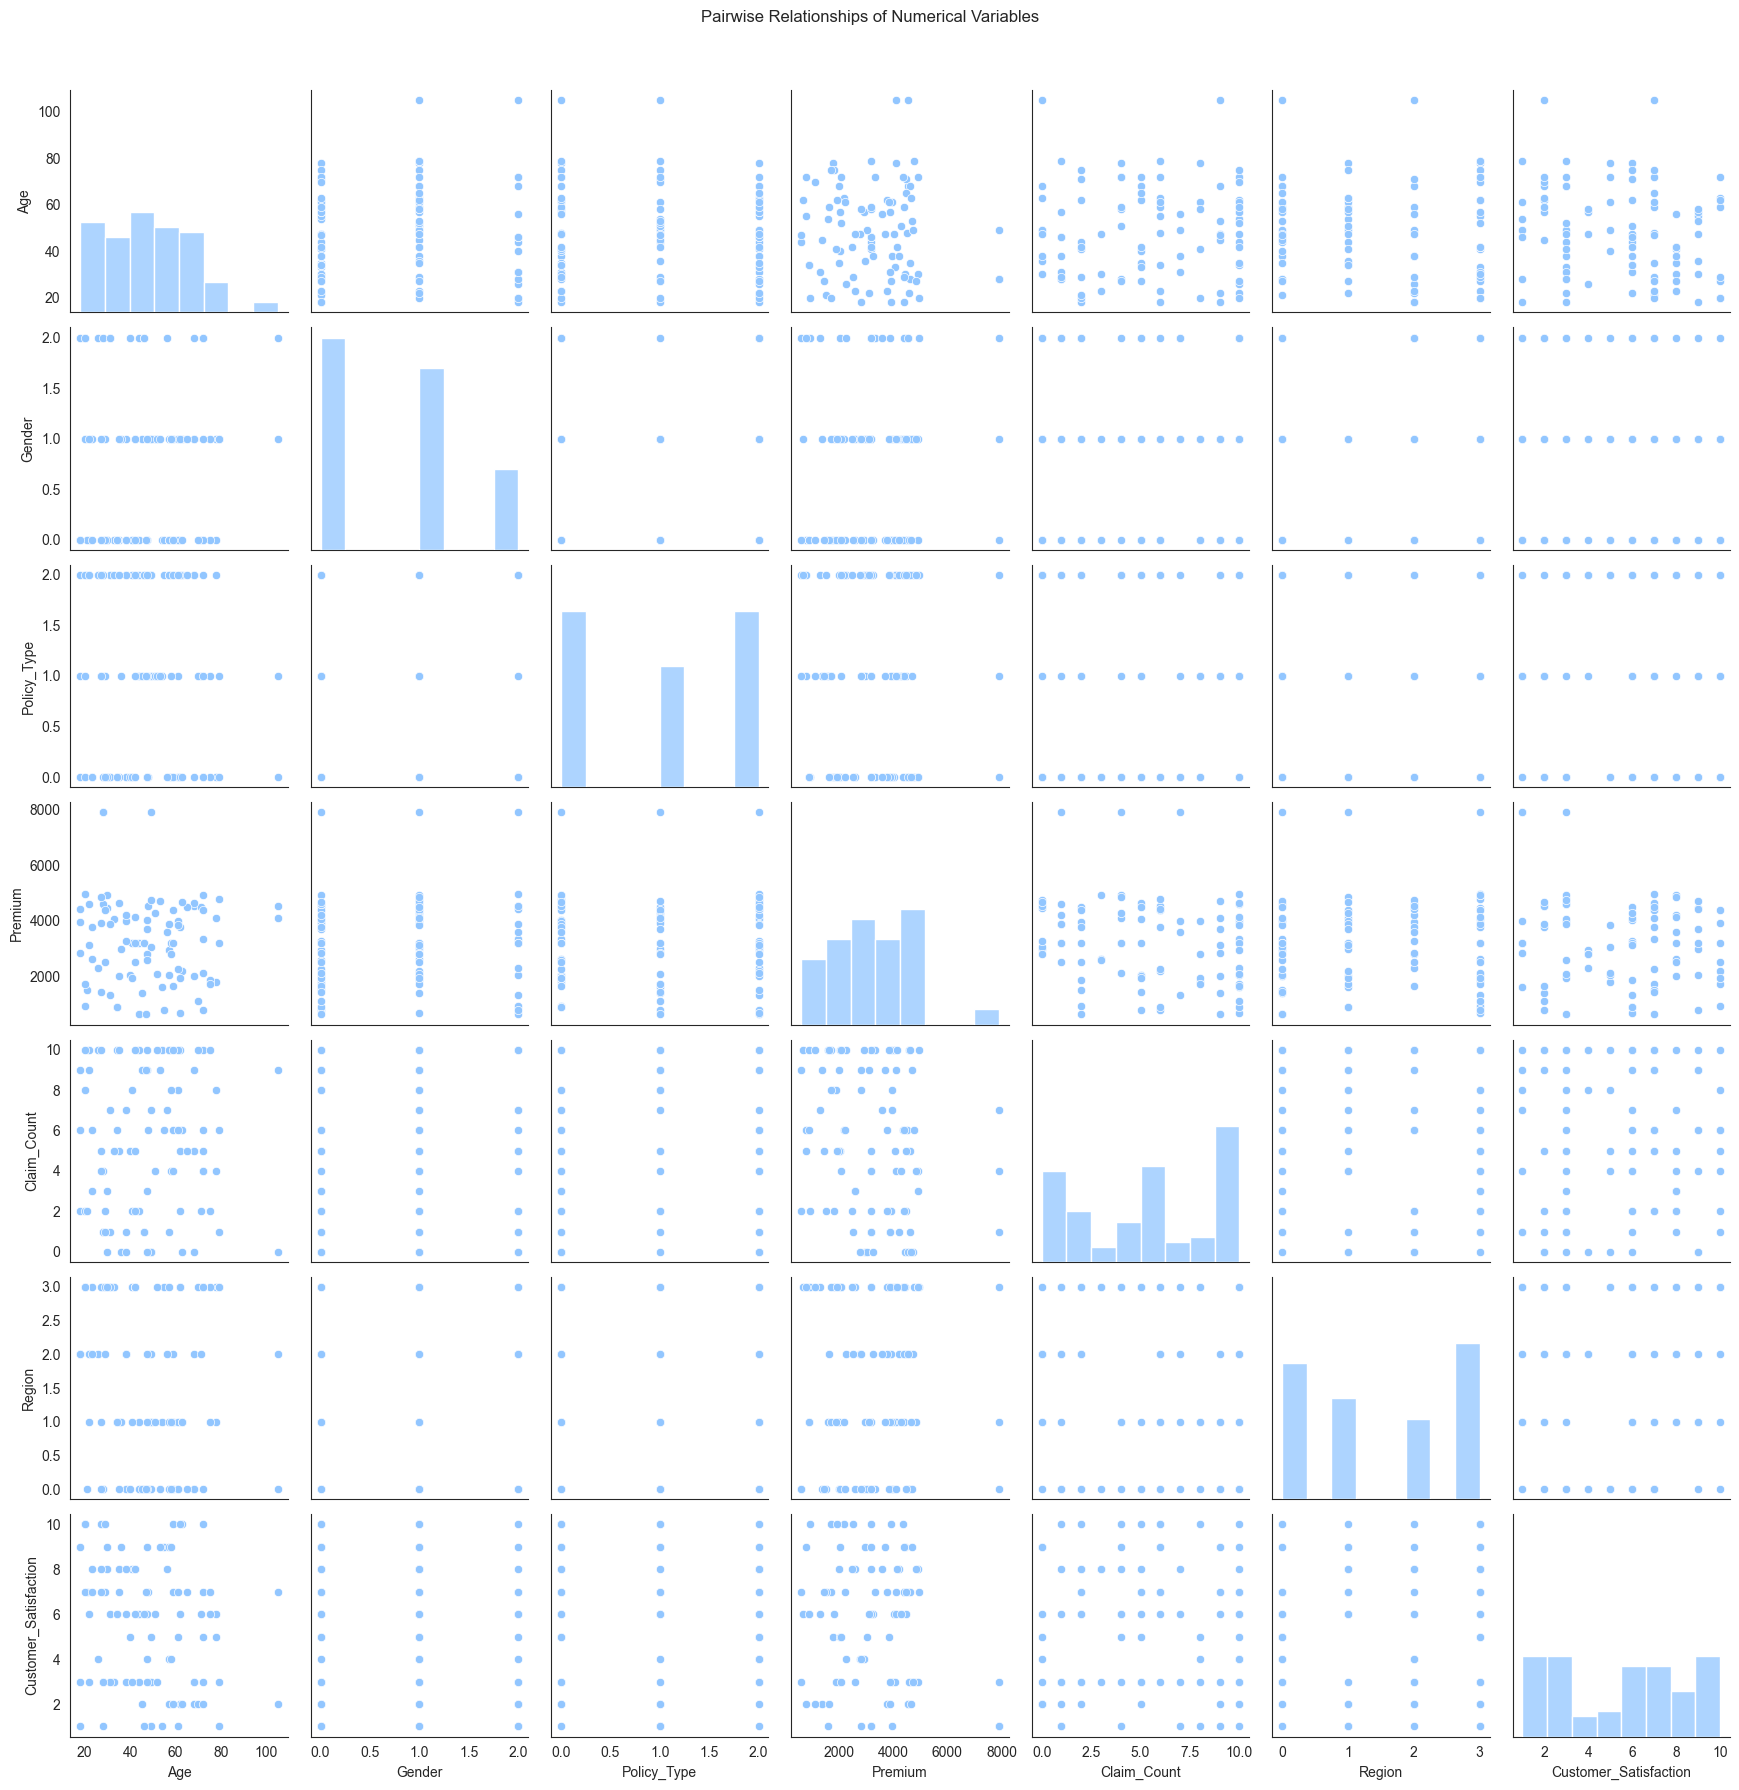

In [91]:

# Pairwise correlation
sns.pairplot(data_cleaned[numerical_cols])
plt.suptitle('Pairwise Relationships of Numerical Variables', y=1.02)
plt.tight_layout()
plt.show()



### 3.4 **Customer Segmentation**

Let us segment customers and analyze customer loyalty based on age groups.

In [92]:
segmentation_table = pd.pivot_table(data,
                                   index='Age_Group',
                                   columns='Loyalty_Segment',
                                   values='Customer_ID',
                                   aggfunc='count',
                                   fill_value=0)
print("\nCustomer Segmentation by Age Group and Loyalty Segment:")
print(segmentation_table)


Customer Segmentation by Age Group and Loyalty Segment:
Loyalty_Segment  New  Mid-term  Loyal
Age_Group                            
<25                3         5      3
25-40              5        12      5
40-60              6        22      6
60+                6        13      8


C:\Users\nirul\AppData\Local\Temp\ipykernel_32472\266935586.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  segmentation_table = pd.pivot_table(data,


#### Age Group showing Loyalty Segment distribution

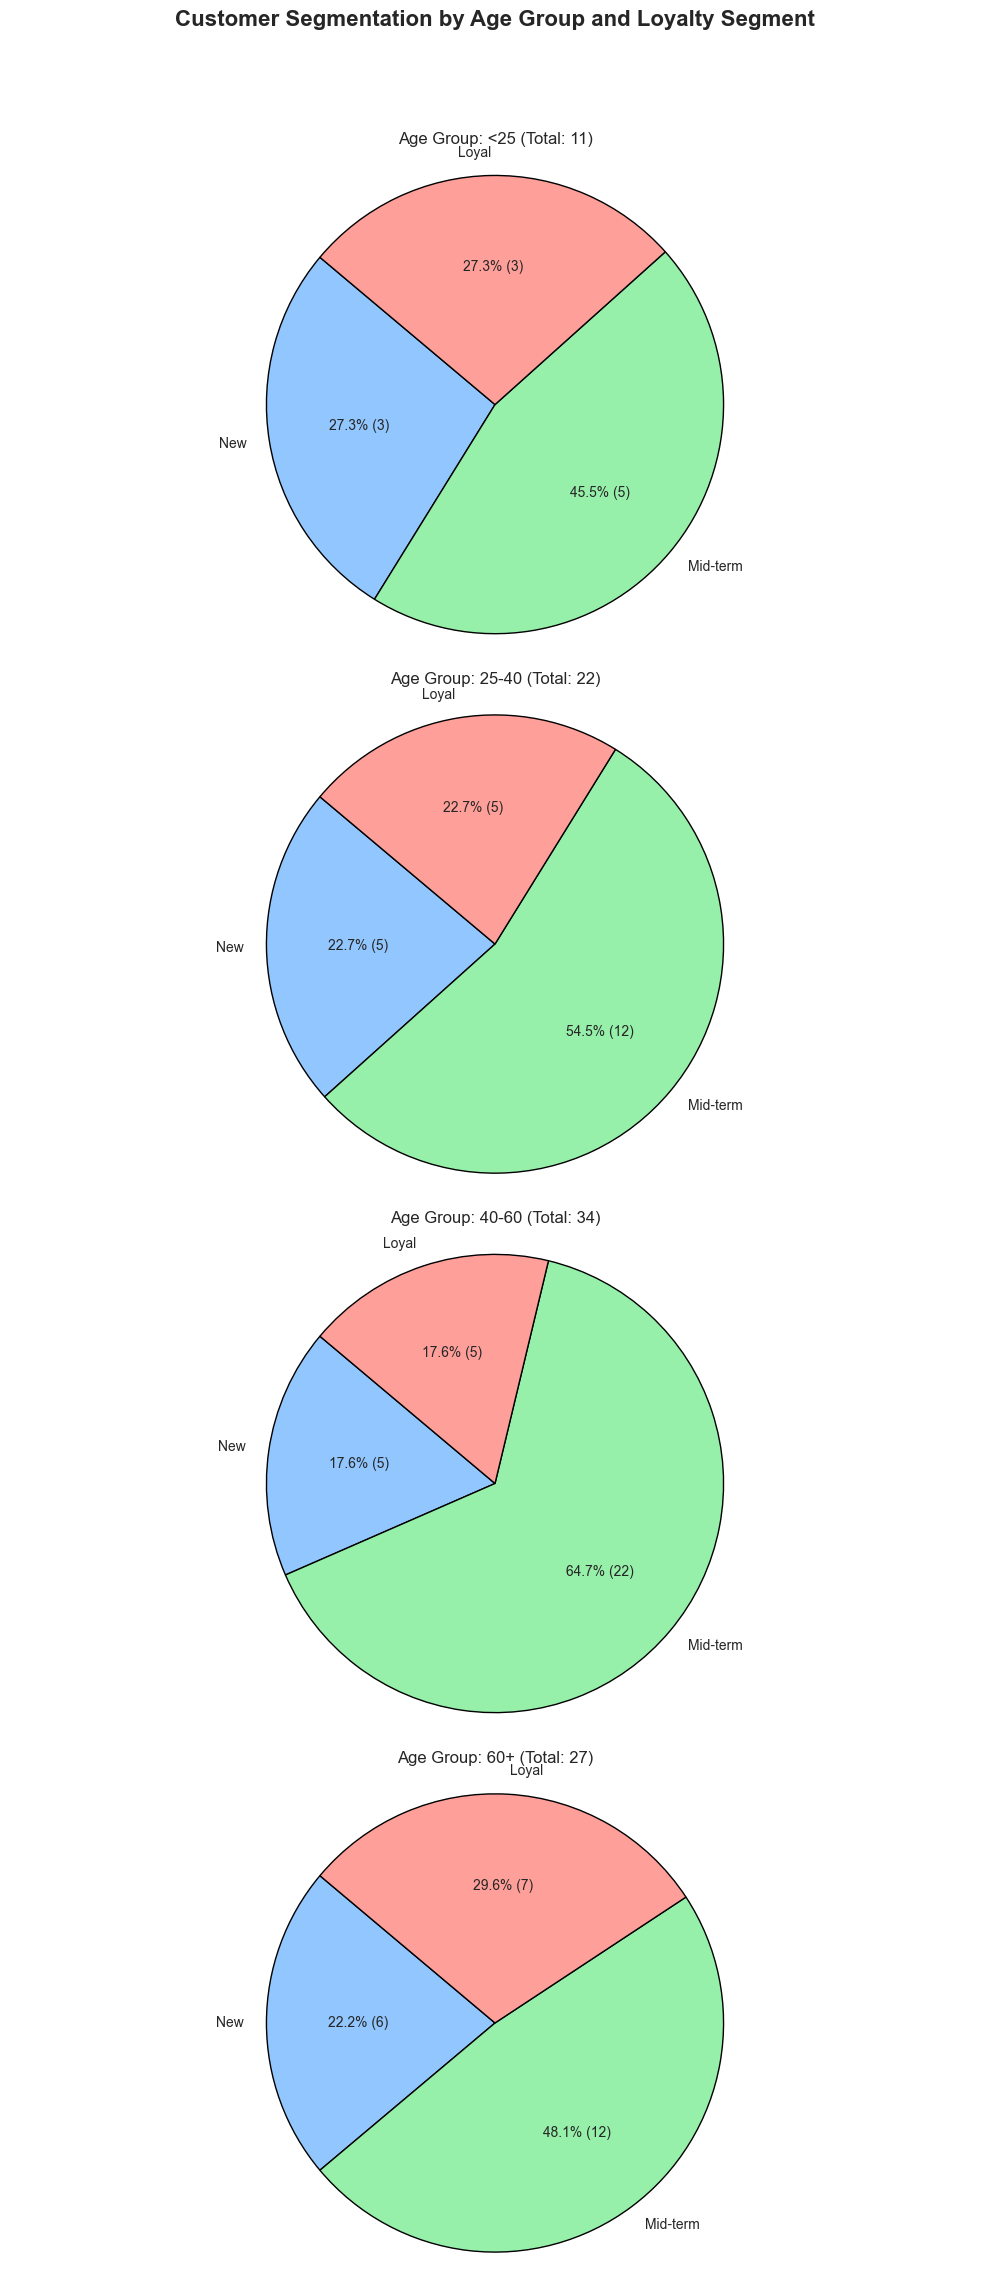

In [93]:

sns.set_palette("pastel")
plt.style.use('seaborn-v0_8-pastel') 

# Create pie charts
fig, axes = plt.subplots(nrows=len(segmentation_table.index), ncols=1, figsize=(10, 6 * len(segmentation_table.index)))
fig.suptitle('Customer Segmentation by Age Group and Loyalty Segment', fontsize=16, fontweight='bold')

for i, age_group in enumerate(segmentation_table.index):
    row = segmentation_table.loc[age_group]
    sizes = row.values
    labels = row.index
    total = sum(sizes)

    if total > 0:
        axes[i].pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}% ({int(p * total / 100)})',
                    startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 10})
        axes[i].axis('equal')  
        axes[i].set_title(f'Age Group: {age_group} (Total: {total})', fontsize=12)
    else:
        axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
        axes[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()


The pie charts illustrate customer segmentation by age group and loyalty segment. 

- Across all age groups, the "Mid-term" loyalty segment consistently holds the largest proportion of customers. The "New" segment generally represents the second-largest group, indicating a steady influx of new customers. 

- The "Loyal" segment tends to be the smallest in the younger age groups (<25 and 25-40), suggesting that building long-term loyalty takes time. However, the proportion of "Loyal" customers increases in the older age groups (40-60 and 60+), implying that older customers are more likely to remain loyal to the company. This could be due to factors like established trust, longer history with the company, or potentially different needs and switching behavior across age demographics. 

- The consistent dominance of the "Mid-term" segment highlights the importance of strategies to convert these customers into the more valuable "Loyal" segment.

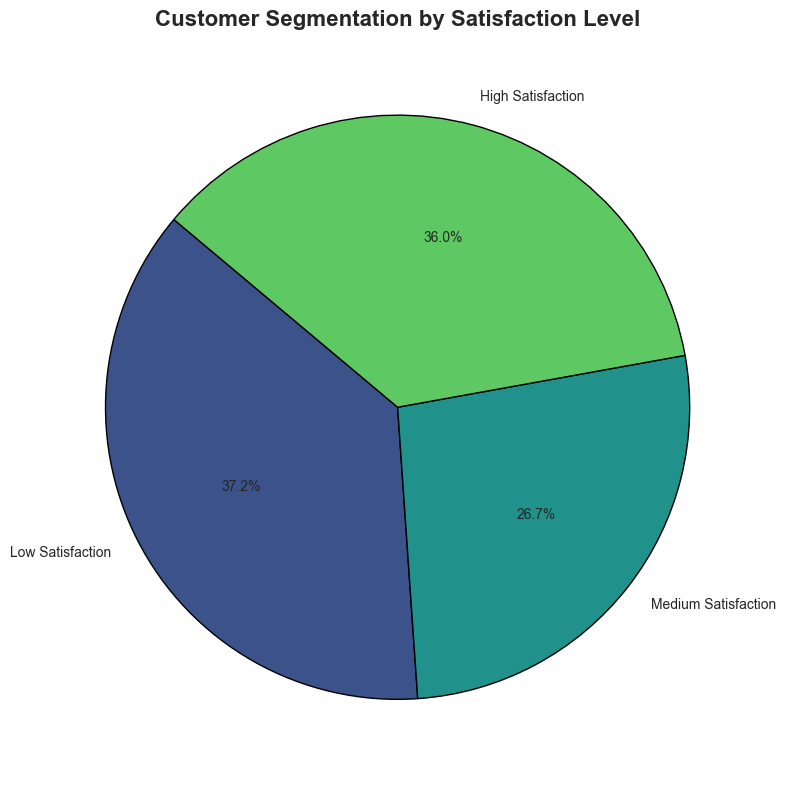

In [98]:
bins = [0, 4, 7, 10]
labels = ['Low Satisfaction', 'Medium Satisfaction', 'High Satisfaction']
data['Customer_Satisfaction'] = pd.cut(
    data['Customer_Satisfaction'], bins=bins, labels=labels, right=False, include_lowest=True
)

satisfaction_counts = data_cleaned['Customer_Satisfaction'].value_counts(dropna=True).sort_index()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.style.use('seaborn-v0_8-pastel')
colors = sns.color_palette('viridis', n_colors=len(satisfaction_counts))

plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 10})

plt.title('Customer Segmentation by Satisfaction Level', fontsize=16, fontweight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.show()


The pie chart shows that the customer base is fairly evenly split between Low (37.2%) and High (36.0%) satisfaction levels, with a smaller portion having Medium (26.7%) satisfaction.

C:\Users\nirul\AppData\Local\Temp\ipykernel_32472\3699915605.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmented_satisfaction = data.groupby('Age_Group')['Customer_Satisfaction'].value_counts(normalize=True).unstack()



Customer Satisfaction Levels by Age Group:
Customer_Satisfaction  Low Satisfaction  Medium Satisfaction  \
Age_Group                                                      
<25                            0.333333             0.111111   
25-40                          0.300000             0.250000   
40-60                          0.333333             0.303030   
60+                            0.500000             0.291667   

Customer_Satisfaction  High Satisfaction  
Age_Group                                 
<25                             0.555556  
25-40                           0.450000  
40-60                           0.363636  
60+                             0.208333  


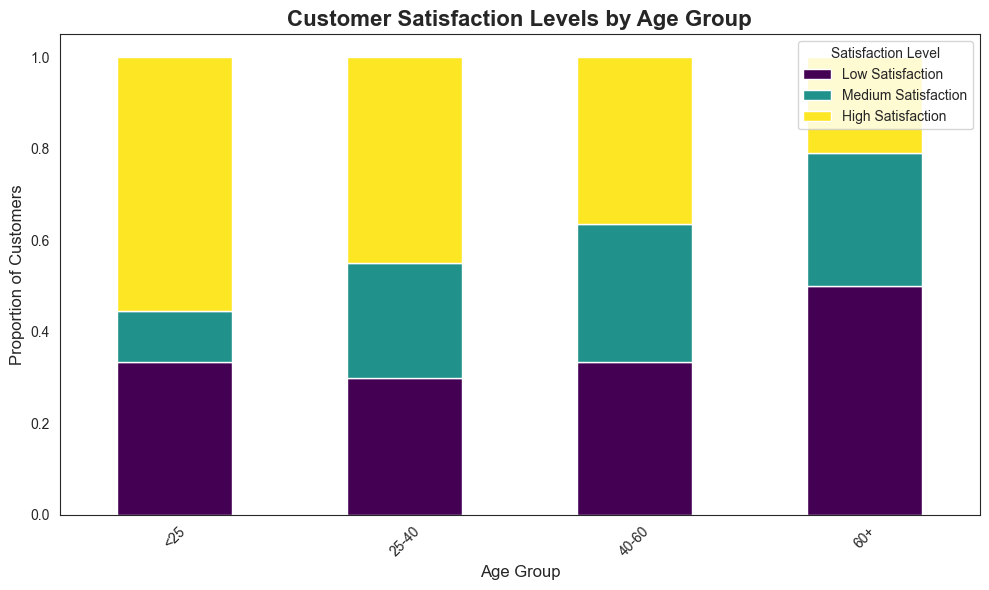

In [99]:
segmented_satisfaction = data.groupby('Age_Group')['Customer_Satisfaction'].value_counts(normalize=True).unstack()
print("\nCustomer Satisfaction Levels by Age Group:")
print(segmented_satisfaction)

segmented_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Customer Satisfaction Levels by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Proportion of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level')
plt.tight_layout()
plt.show()

The stacked bar chart reveals that younger age groups (<25 and 25-40) have a higher proportion of highly satisfied customers, potentially due to their greater comfort with digital channels and simpler product needs. 

In contrast, the 60+ age group shows a significantly larger proportion of customers with low and medium satisfaction, which could stem from challenges with technology, a preference for more personalized, in-person service that may be lacking, or unmet expectations related to complex financial products.

## 4. **Conclusion and Recommendations**


### 4.1. **Main Insights:**

* **Age Distribution:** The customer base shows a somewhat normal age distribution with a slight skew towards younger individuals.
* **Gender Distribution:** Gender is distributed across three categories, with a near-even split between the first two.
* **Policy Type Distribution:** Customers are concentrated in three distinct policy types.
* **Premium Distribution:** Premium amounts are right-skewed, indicating more customers with lower premiums.
* **Claim Count Distribution:** Claim counts are heavily skewed towards lower values, with most customers having few or no claims.
* **Customer Satisfaction:** Customer satisfaction tends to cluster in the higher range, but there's a significant portion with low satisfaction.
* **Regional Distribution:** Customers are distributed across four regions with varying frequencies.
* **Weak Correlations:** Most numerical variables show weak linear relationships, with a slight negative correlation between premium and claim count and between customer satisfaction and age/premium.
* **Loyalty Segmentation:**
    * "Mid-term" customers are the largest group across all age groups.
    * Younger age groups have fewer "Loyal" customers.
    * Older age groups have a higher proportion of "Loyal" customers.
* **Satisfaction Segmentation:**
    * The customer base is fairly evenly split between "Low" and "High" satisfaction.
    * Younger age groups show higher proportions of "High" satisfaction.
    * Older age groups (especially 60+) exhibit a larger proportion of "Low" and "Medium" satisfaction.



### 4.2. **Actionable Recommendations:**

1.  **Address Lower Satisfaction in Older Segments:**
    * **Recommendation:** Conduct targeted surveys and interviews with customers in the 60+ age group who report low or medium satisfaction to understand their specific pain points.Based on the feedback, consider offering dedicated support channels (e.g., phone assistance with patient representatives), simplified policy information, or tailored product offerings that better meet the needs of older customers.
    * **Reason:** Our analysis shows a clear trend of decreasing satisfaction with age. Understanding the reasons (e.g., difficulty with digital platforms, need for more personalized service, product suitability) is crucial for improving retention in this segment.
     
2.  **Nurture Mid-Term Customers Towards Loyalty:**
    * **Recommendation:** Implement targeted engagement programs for "Mid-term" customers to encourage long-term loyalty.Consider offering loyalty rewards, personalized communication based on their policy history and engagement, or early access to new features or products.
    * **Reason:** This is the largest customer segment, and increasing their loyalty can significantly impact long-term revenue and reduce churn.
    
3.  **Investigate High Claim Frequency in Policy Type '1':**
    * **Recommendation:** Conduct a detailed analysis of Policy Type '1' to understand the reasons for its higher average claim count.Investigate the risks covered by this policy, the demographics of policyholders, and potential areas for fraud or misuse. Based on the findings, consider adjusting pricing, coverage terms, or implementing stricter claim review processes.
    * **Reason:** While it generates less total premium, a high claim frequency could impact profitability.

4.  **Tailor Marketing and Product Offerings by Age Group:**
    * **Recommendation:** Develop age-specific marketing campaigns and potentially tailor product offerings based on the satisfaction levels and preferences observed in different age segments.For younger audiences, focus on digital engagement and potentially simpler, cost-effective policies. For older audiences, emphasize reliable customer support and potentially more comprehensive or tailored plans.
    * **Reason:** Younger customers seem more satisfied overall, while older customers have specific concerns.

5.  **Further Investigate Regional Premium Differences:**
    * **Recommendation:** Analyze the factors contributing to the higher average premium in Region '2' compared to others.Conduct market research in different regions to understand customer needs and price sensitivity, and evaluate if current policy offerings and pricing are optimized for each region.
    * **Reason:** Understanding these factors (e.g., types of policies sold, customer demographics, local market conditions) can inform pricing strategies and identify potential opportunities in other regions.